<a href="https://colab.research.google.com/github/KLU-Venky/TechnoHacks/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Weather Data**

Analyzing weather data involves a systematic process using datasets. Initially, relevant weather data is collected from reputable sources. This data is then cleaned to rectify errors and inconsistencies. Exploratory Data Analysis (EDA) is conducted through visualizations like histograms and scatter plots to unearth trends and anomalies. Feature engineering derives new variables, enhancing insights. Statistical analysis quantifies central tendencies and variability. Time series analysis reveals patterns over time, while correlation analysis identifies relationships between variables. Hypothesis testing validates assumptions, and machine learning models predict future conditions. Visualization methods create impactful representations. Insights gained from the analysis provide valuable conclusions about weather patterns, effects, and potential consequences. Comprehensive documentation ensures transparency and reproducibility. This meticulous process ensures accurate, meaningful insights for various applications, from climate research to disaster preparedness.

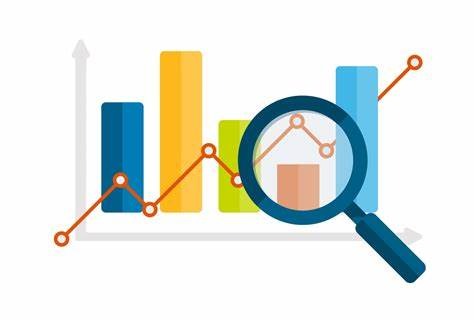

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [ ]:
sample='2023-01-01 2013-01-01 24 34 34 34 35 35 35 35 36 36 36 37 36 36 35 34 33 32 31 30 29 26 25 23 22 1'
sample

'2023-01-01 2013-01-01 24 34 34 34 35 35 35 35 36 36 36 37 36 36 35 34 33 32 31 30 29 26 25 23 22 1'

In [ ]:
sample=sample.split()
sample

['2023-01-01',
 '2013-01-01',
 '24',
 '34',
 '34',
 '34',
 '35',
 '35',
 '35',
 '35',
 '36',
 '36',
 '36',
 '37',
 '36',
 '36',
 '35',
 '34',
 '33',
 '32',
 '31',
 '30',
 '29',
 '26',
 '25',
 '23',
 '22',
 '1']

In [ ]:
startdate=sample[0]
enddate=sample[1]
count=sample[2]
temperature=sample[3:-1]
predict_days=sample[-1]

In [ ]:
from datetime import datetime,timedelta
startdatetime=datetime.strptime(startdate,'%Y-%m-%d')
tmp=[]
for i in range(int(count)):
    row=(startdatetime,temperature[i])
    tmp.append(row)
    startdatetime+=timedelta(hours=1)
labels=['datetime','temp']
result=pd.DataFrame.from_records(tmp,columns=labels)
result

,datetime,temp
0,2023-01-01 00:00:00,34
1,2023-01-01 01:00:00,34
2,2023-01-01 02:00:00,34
3,2023-01-01 03:00:00,35
4,2023-01-01 04:00:00,35
5,2023-01-01 05:00:00,35
6,2023-01-01 06:00:00,35
7,2023-01-01 07:00:00,36
8,2023-01-01 08:00:00,36
9,2023-01-01 09:00:00,36


In [ ]:
temp=pd.read_csv('temperature.csv')
temp.head(3)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.83000,287.170000,307.59,305.47,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.83465,287.186092,307.59,304.31,310.495769,304.4,304.4,303.5


In [ ]:
boston=temp.loc[:,['datetime','Boston']]
boston.head(3)

,datetime,Boston
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,287.170000
2,2012-10-01 14:00:00,287.186092


In [ ]:
print(boston.isnull().sum())
boston.fillna(method='bfill',inplace=True)
boston.isnull().sum()

datetime    0
Boston      3
dtype: int64


datetime    0
Boston      0
dtype: int64

In [ ]:
#change temperature into C

boston.iloc[:,1]=boston.iloc[:,1].apply(round)-273.15

#select part of data into train test split
bostonsample=boston[boston['datetime']>='2013-01-01 00:00:00']
bostonsample=bostonsample.iloc[0:12*(154+48)]

bostonsample['datetime']=pd.to_datetime(bostonsample['datetime'])
bostonsample.columns=['time','temp']
bostonsample

,time,temp
2196,2013-01-01 00:00:00,-4.15
2197,2013-01-01 01:00:00,-4.15
2198,2013-01-01 02:00:00,-5.15
2199,2013-01-01 03:00:00,-6.15
2200,2013-01-01 04:00:00,-6.15
...,...,...
4615,2013-04-11 19:00:00,16.85
4616,2013-04-11 20:00:00,15.85
4617,2013-04-11 21:00:00,14.85
4618,2013-04-11 22:00:00,12.85


In [ ]:
train=bostonsample[0:77*24]
test=bostonsample[77*24:]

In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
#import plotly.plotly as py # visualization library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go # plotly graphical object

plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

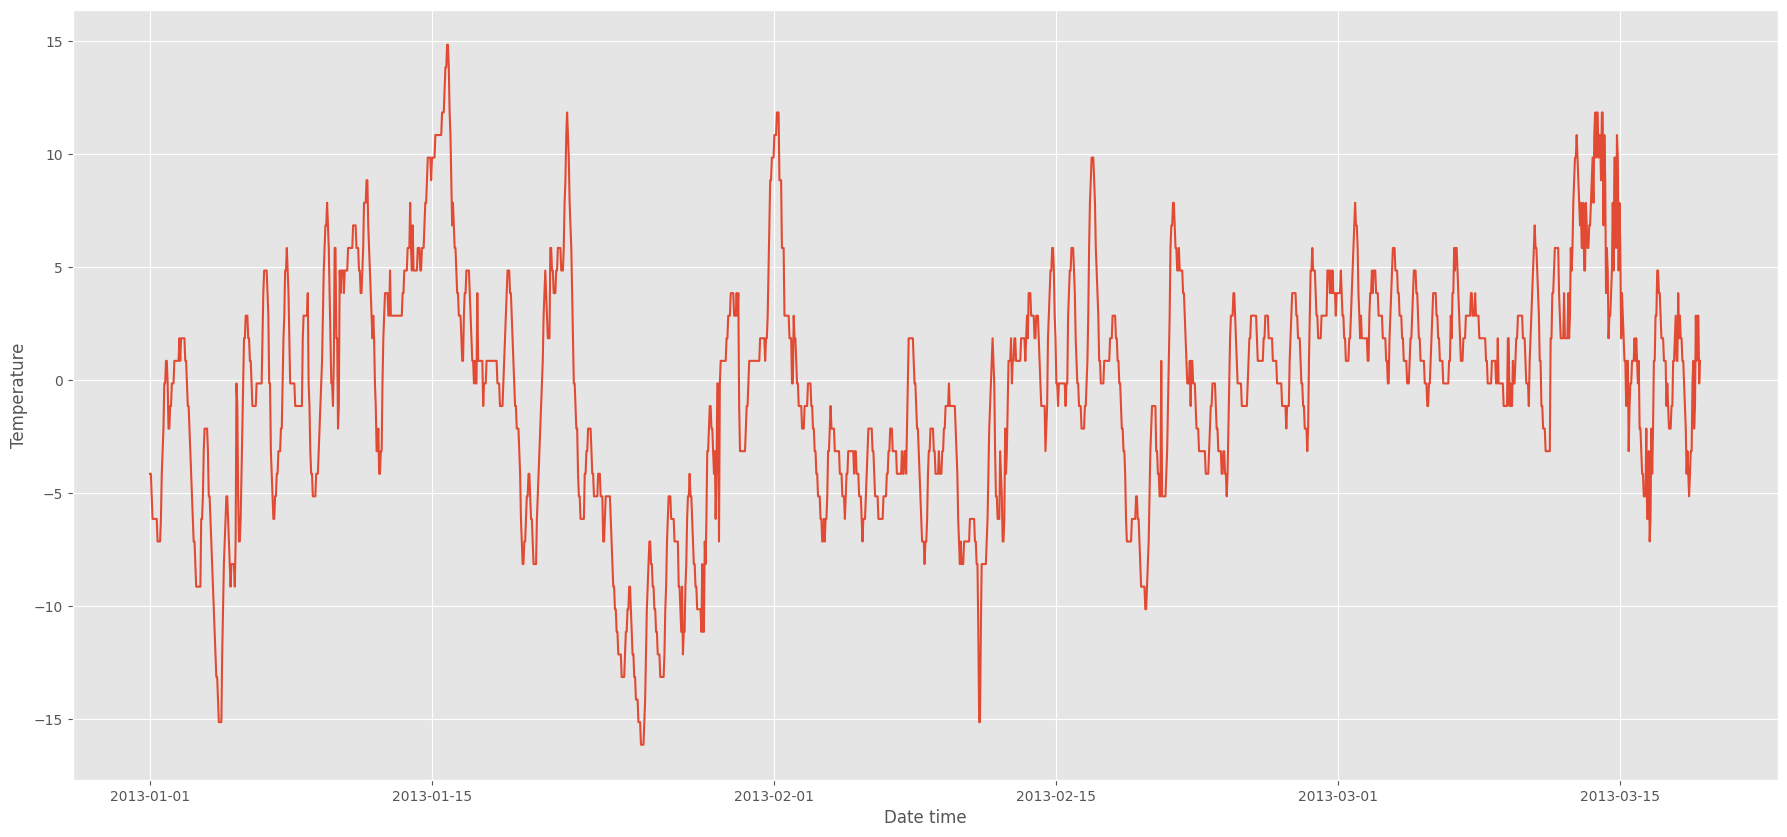

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(train.time,train.temp)
#plt.title("Temperature ")
plt.xlabel("Date time")
plt.ylabel("Temperature")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ts=train
ts.index=ts.time
ts.drop('time',inplace=True,axis=1)

In [ ]:
ts.head()

,temp
time,
2013-01-01 00:00:00,-4.15
2013-01-01 01:00:00,-4.15
2013-01-01 02:00:00,-5.15
2013-01-01 03:00:00,-6.15
2013-01-01 04:00:00,-6.15


In [ ]:
ts.rolling(window=6).mean().head(10)

,temp
time,
2013-01-01 00:00:00,NaN
2013-01-01 01:00:00,NaN
2013-01-01 02:00:00,NaN
2013-01-01 03:00:00,NaN
2013-01-01 04:00:00,NaN
2013-01-01 05:00:00,-5.316667
2013-01-01 06:00:00,-5.650000
2013-01-01 07:00:00,-5.983333
2013-01-01 08:00:00,-6.150000


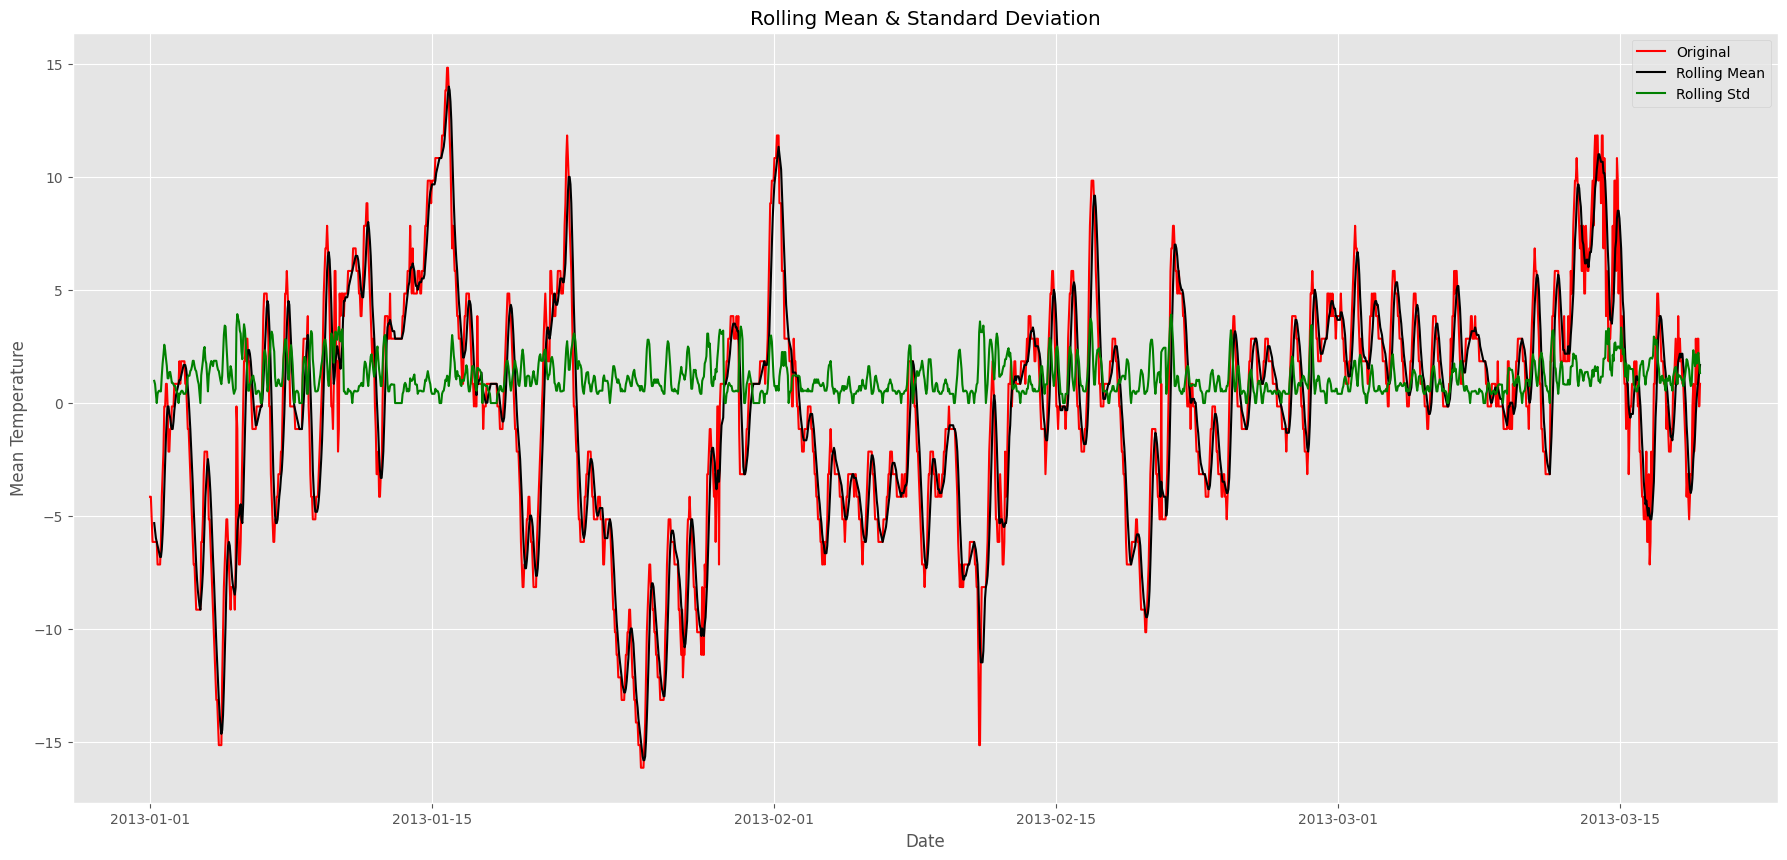

Test statistic:  -4.80575767844078
p-value:  5.302329901257017e-05
Critical Values: {'1%': -3.4339441475744668, '5%': -2.8631276157416945, '10%': -2.5676151930364455}


In [ ]:
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts.temp)
check_adfuller(ts.temp)

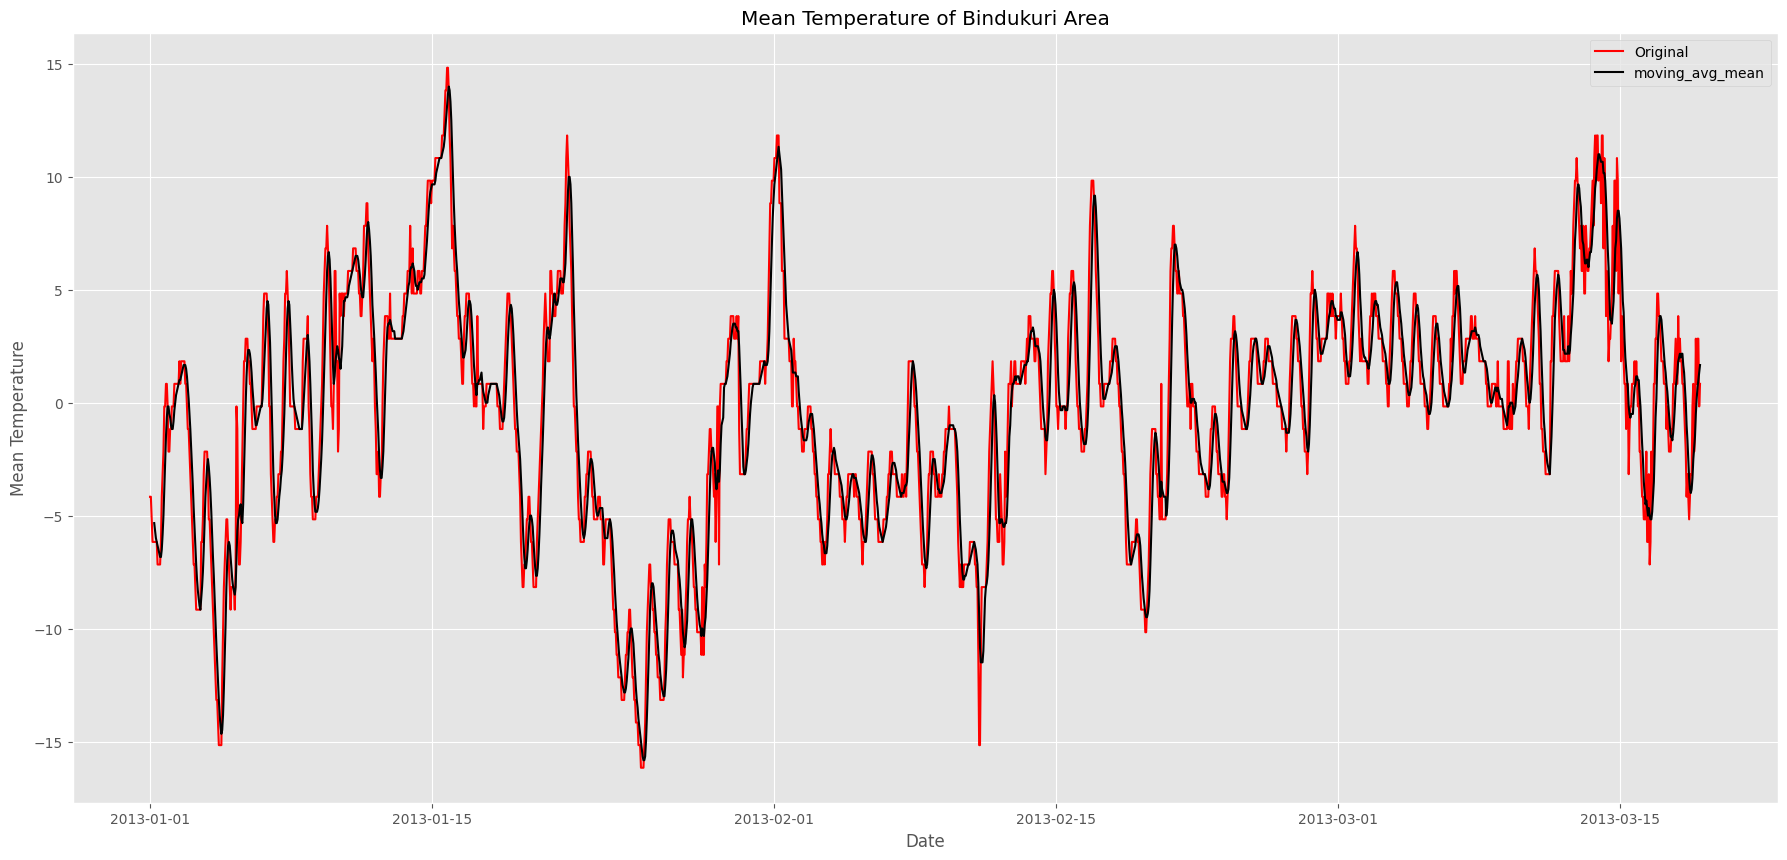

In [ ]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window=window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

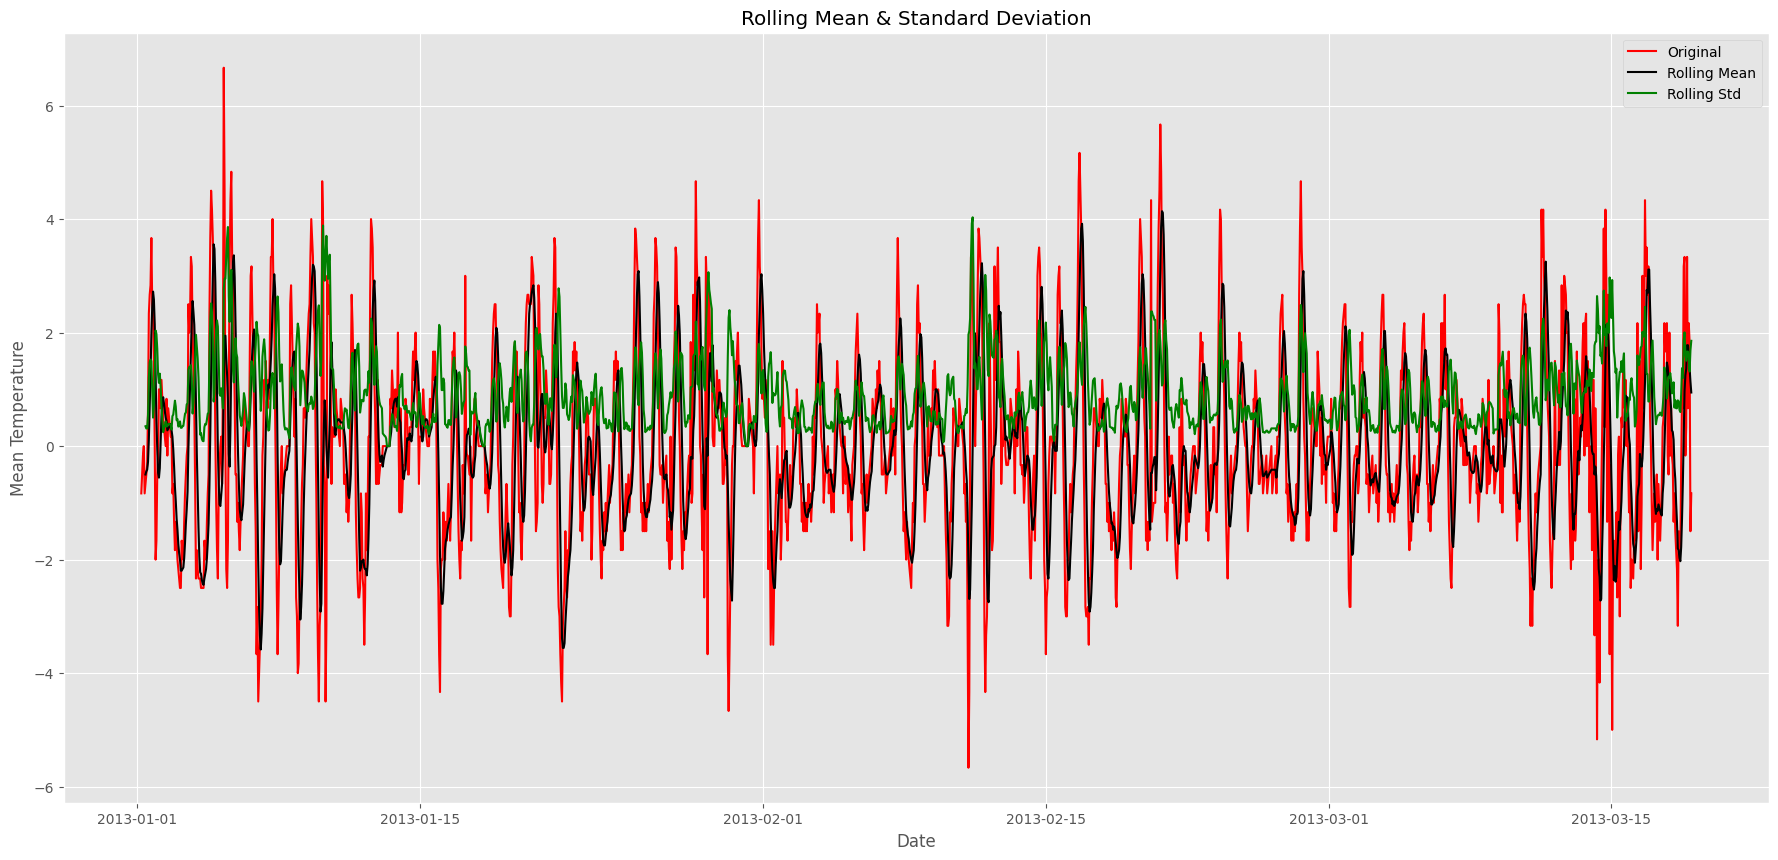

Test statistic:  -7.717316520872911
p-value:  1.218494195338115e-11
Critical Values: {'1%': -3.4339481027788024, '5%': -2.8631293617920544, '10%': -2.5676161227508754}


In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.temp)

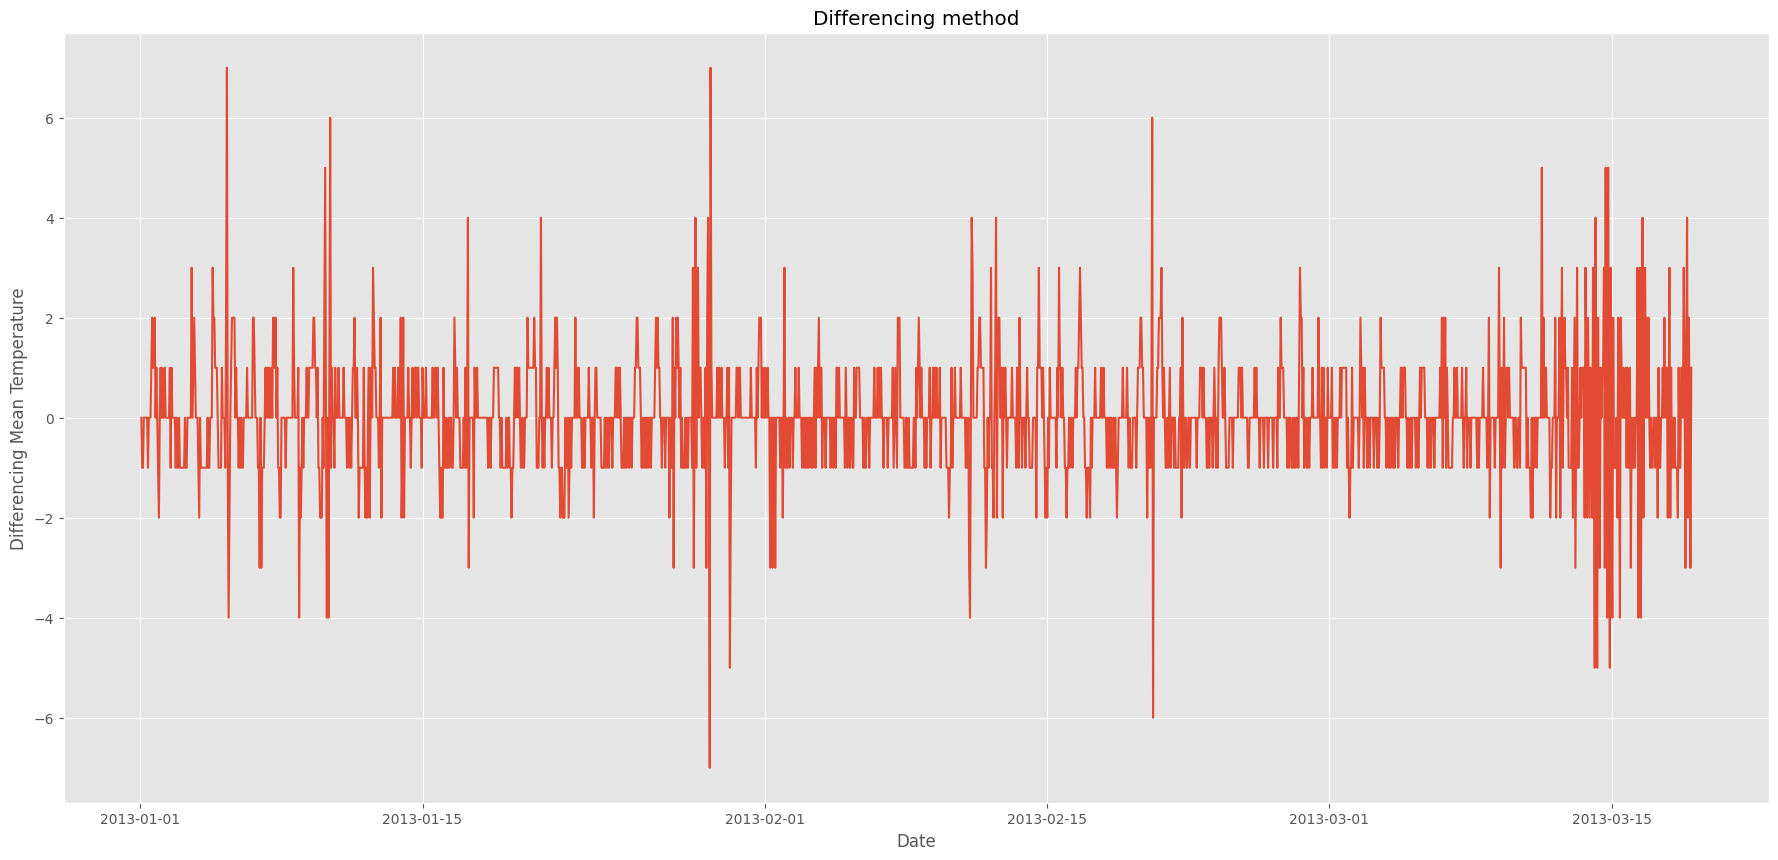

In [ ]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

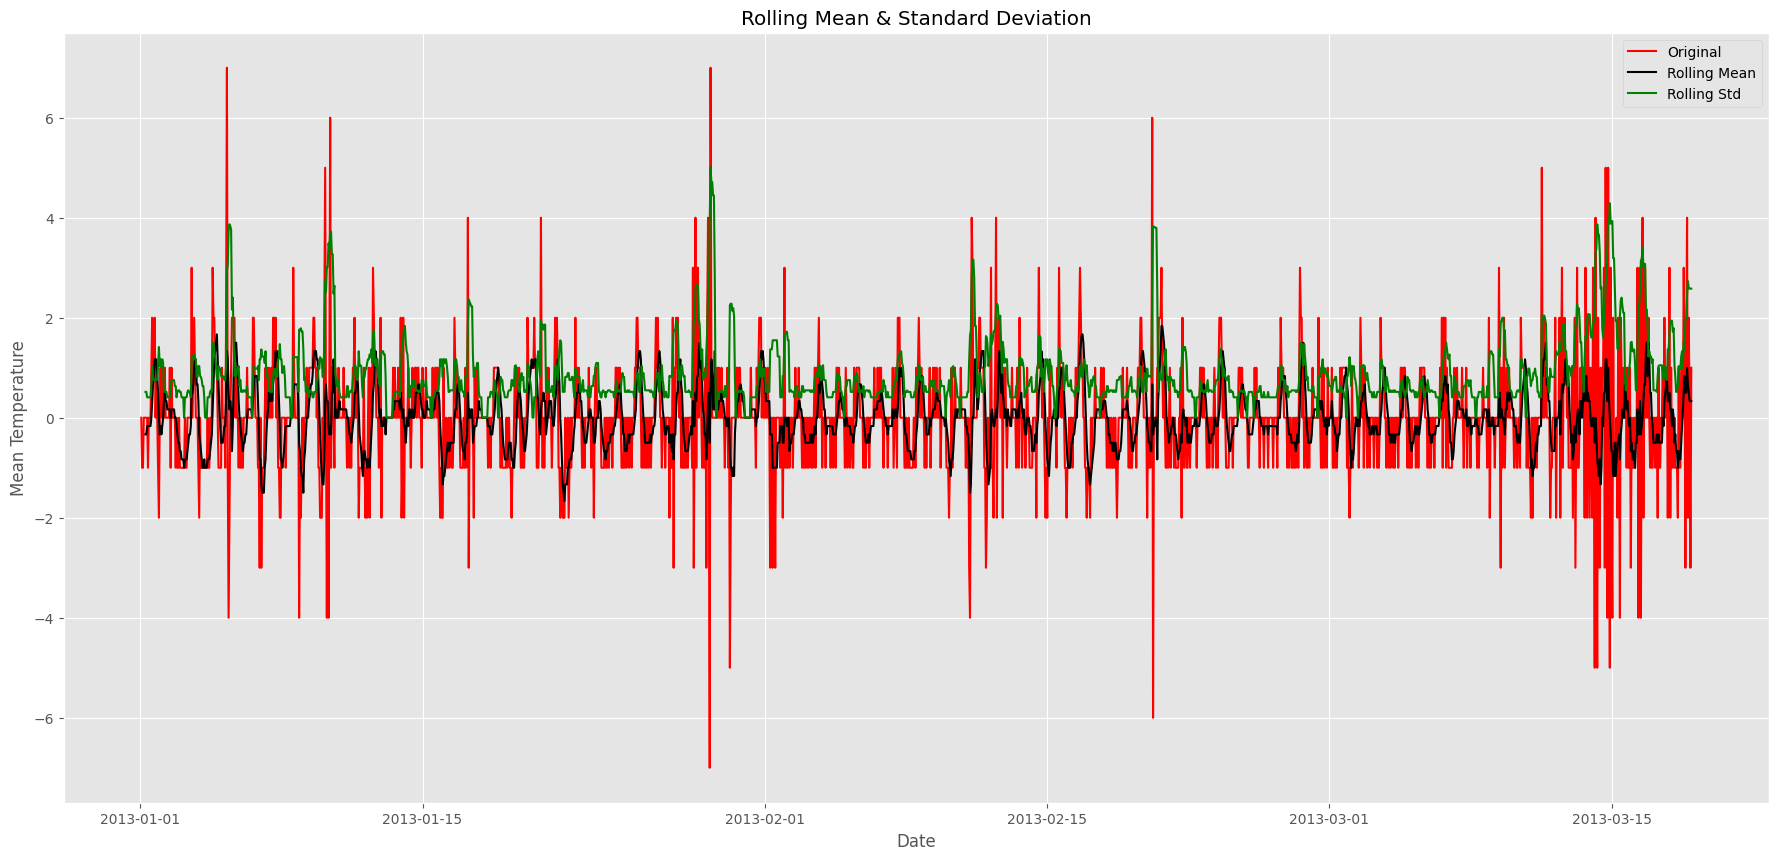

Test statistic:  -8.0026732093248
p-value:  2.311435564502358e-12
Critical Values: {'1%': -3.4339441475744668, '5%': -2.8631276157416945, '10%': -2.5676151930364455}


In [ ]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.temp)

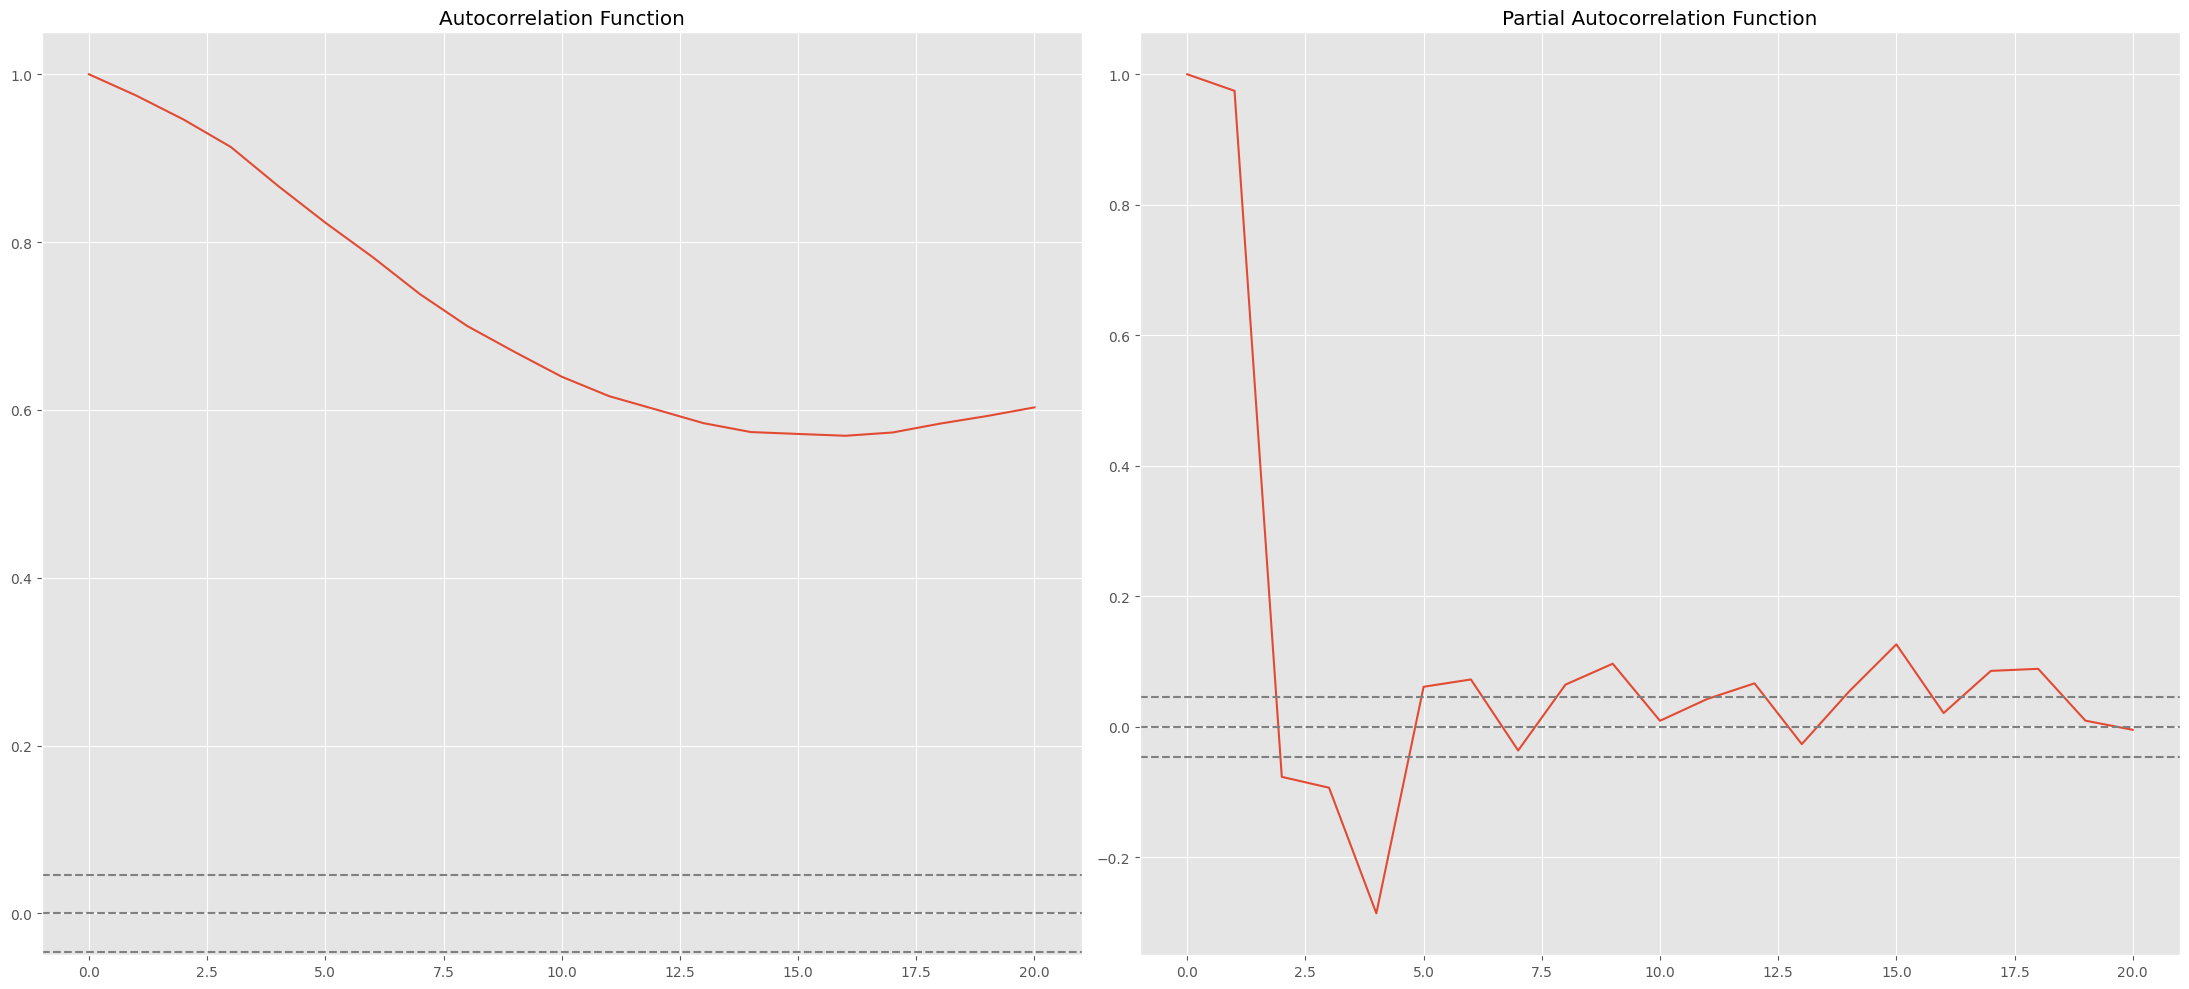

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
lag_acf

array([1.        , 0.97462076, 0.94609387, 0.91335353, 0.86695681,
       0.82314743, 0.78215752, 0.73802881, 0.7000213 , 0.66918015,
       0.63954416, 0.61642146, 0.60037233, 0.58418387, 0.5736055 ,
       0.57133177, 0.56917411, 0.57309403, 0.58362857, 0.59273731,
       0.60299876])

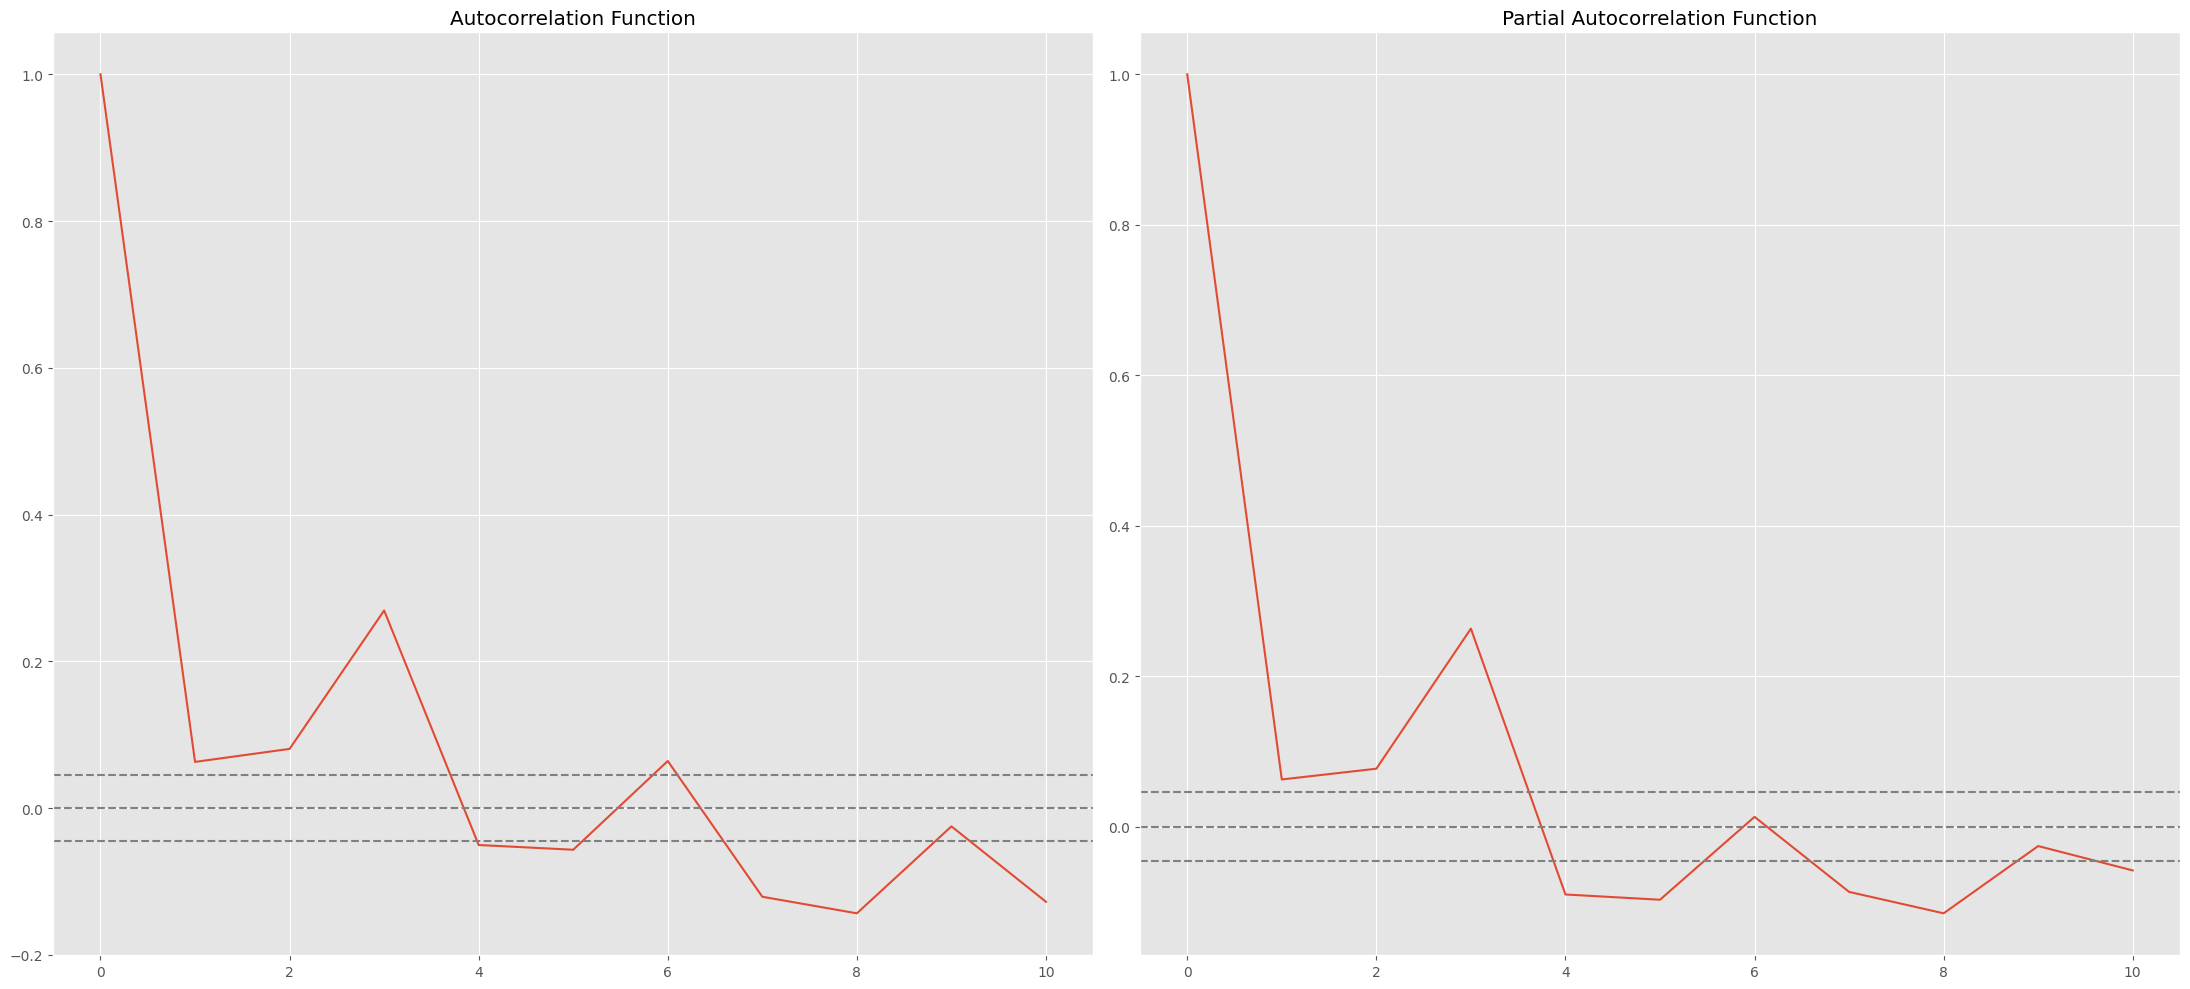

In [ ]:
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=10)
lag_pacf = pacf(ts_diff, nlags=10, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
train

,temp
time,
2013-01-01 00:00:00,-4.15
2013-01-01 01:00:00,-4.15
2013-01-01 02:00:00,-5.15
2013-01-01 03:00:00,-6.15
2013-01-01 04:00:00,-6.15
...,...
2013-03-18 19:00:00,0.85
2013-03-18 20:00:00,2.85
2013-03-18 21:00:00,2.85


In [ ]:
bostonsample[154*24:]

,time,temp


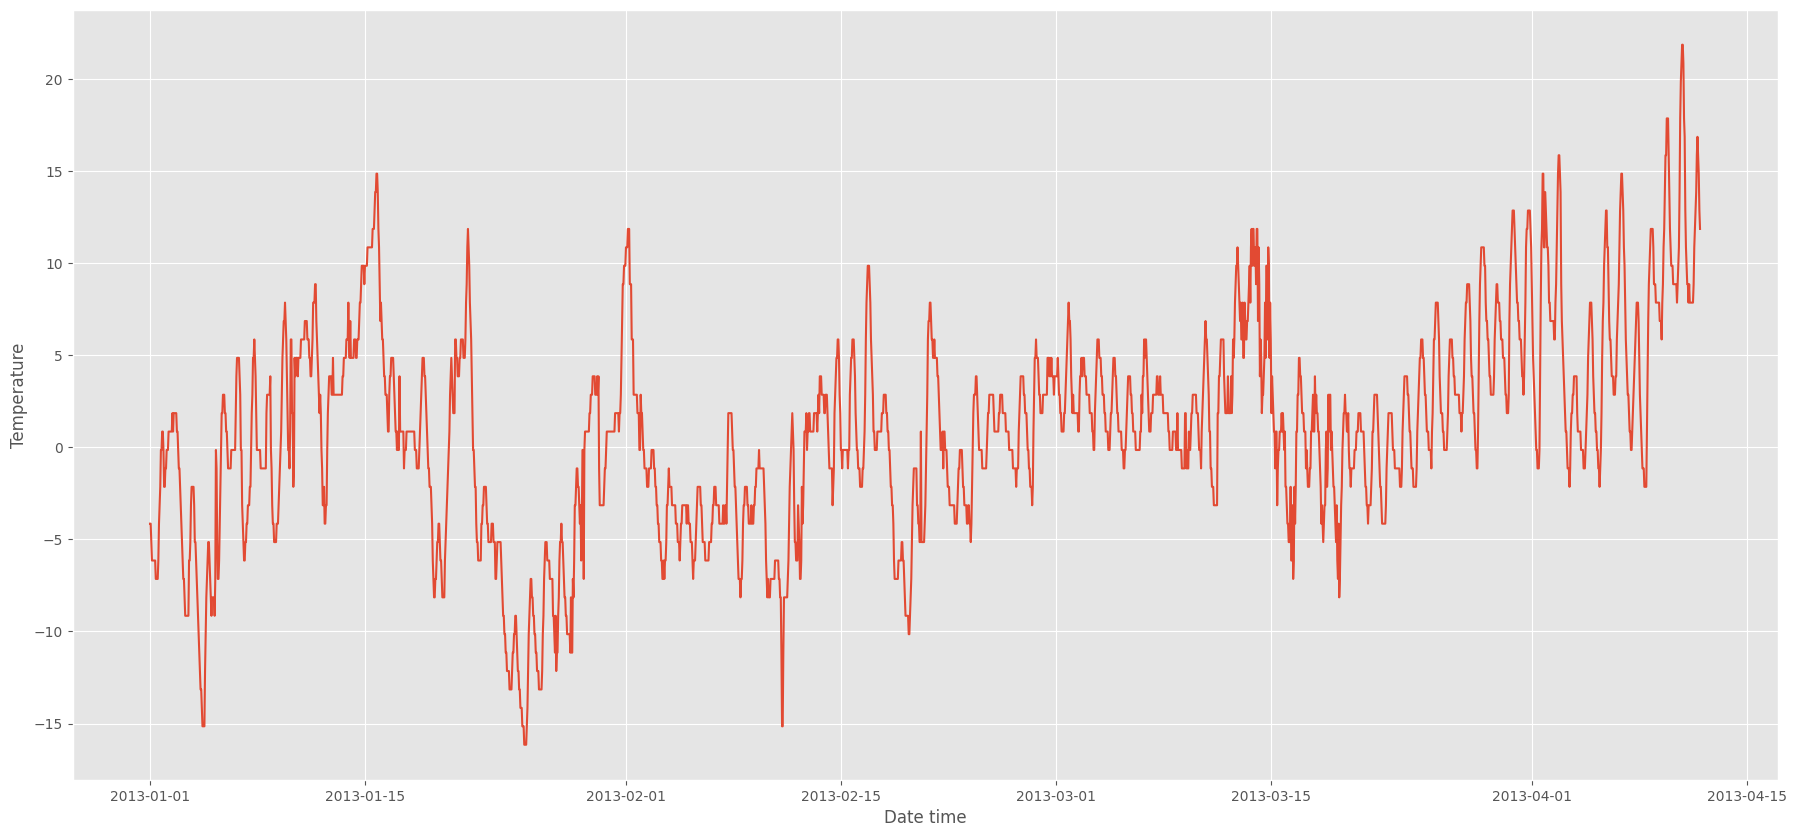

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(bostonsample.time,bostonsample.temp)
#plt.title("Temperature ")
plt.xlabel("Date time")
plt.ylabel("Temperature")
plt.show()

**Conclusion**

 The meticulous analysis of weather data through systematic steps and datasets yields valuable insights into the complex dynamics of our environment. By collecting, cleaning, and exploring these datasets, we uncover patterns, trends, and anomalies that offer a deeper understanding of weather phenomena. Through statistical analysis and correlation studies, we decipher the interplay between different variables, shedding light on the intricate relationships within the atmosphere.

 Ultimately, the culmination of these efforts yields meaningful conclusions that contribute to fields ranging from climate research to disaster management. By documenting our methodologies and ensuring transparency, we ensure the reliability and replicability of our findings, fostering a robust foundation for informed decision-making and a deeper appreciation of the natural world.